In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,median_absolute_error

In [2]:
# https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data/code?datasetId=1381830&sortBy=voteCount

dataset = '/workspaces/predictive_maintenance/data/other/boston.csv'

df = pd.read_csv(dataset)

Attribute Information
Input features in order:
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per $10,000 [$/10k]
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
features = ['CRIM', 'ZN', 'INDUS',  'NOX',  'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO',  'LSTAT']


target = 'MEDV'

In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

In [7]:
# train an XGBoost model 
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
# make predictions
y_pred = xgb_model.predict(X_test)


In [8]:
print('MSE: ', mean_squared_error(y_test, y_pred))
print ('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  19.899796880687806
MAE:  2.8247684628355727
R2:  0.7286407979637066


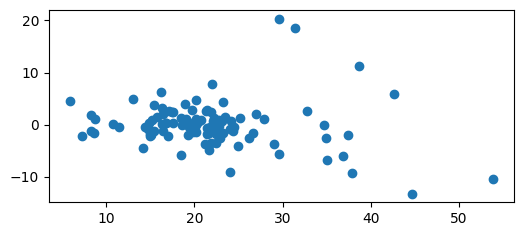

In [9]:
# Calculate errors

residual = y_test - y_pred

# Plot the residuals after fitting a linear model

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)


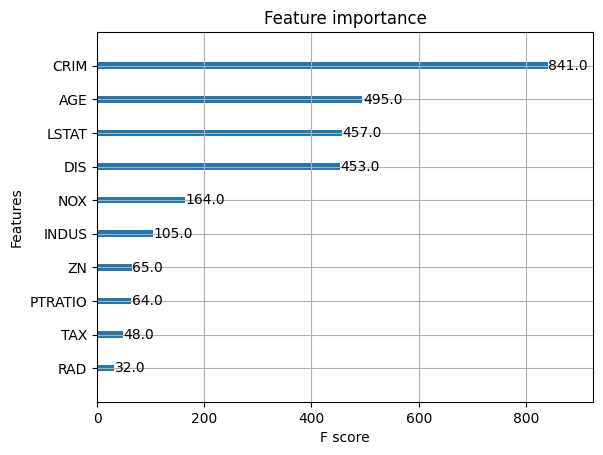

In [10]:
# show the feature importance
xgb.plot_importance(xgb_model)
plt.show()


In [11]:
# train the model using as objective the absolute error
xgb_model = xgb.XGBRegressor(objective="reg:absoluteerror", random_state=42)
xgb_model.fit(X_train, y_train)
# calculate the metrics
y_pred = xgb_model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print ('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  17.405116463241928
MAE:  2.8109593587763166
R2:  0.7626589586249668


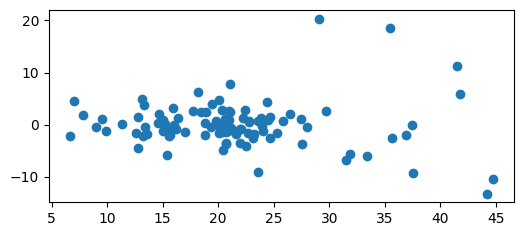

In [12]:

fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

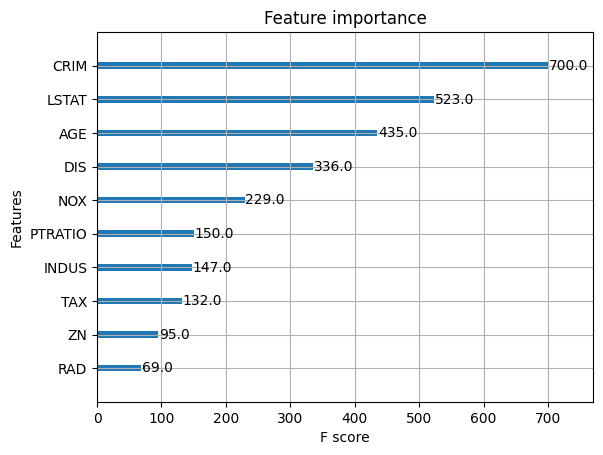

In [13]:
# show the feature importance
xgb.plot_importance(xgb_model)
plt.show()



<AxesSubplot: xlabel='VIF Factor', ylabel='features'>

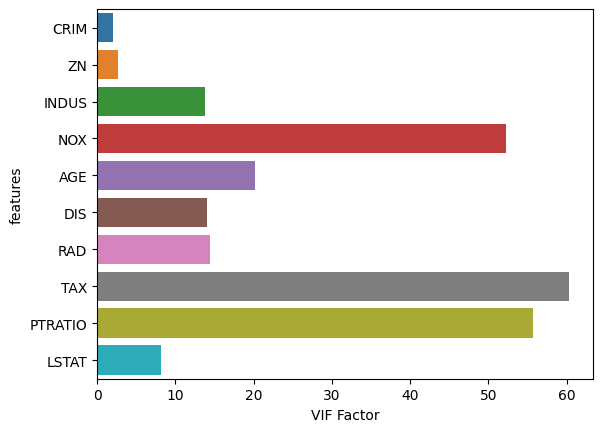

In [14]:

# calculate vif for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df[features].values, i) for i in range(df[features].shape[1])]
vif["features"] = df[features].columns
vif.round(1)
# plot the vif 
sns.barplot(x='VIF Factor', y='features', data=vif)


In [15]:
# train a linear regression model from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

features = ['CRIM', 'ZN', 'INDUS',   'AGE', 'DIS', 'RAD', 
         'LSTAT']

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# use a standard scaler to scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
# calculate the metrics
y_pred = lr_model.predict(X_test)

# calculate the metrics
print('MSE: ', mean_squared_error(y_test, y_pred))
print ('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


MSE:  27.107897225425475
MAE:  3.891238288485617
R2:  0.63034912345703


/tmp/ipykernel_8372/1519212906.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(features, rotation=90)


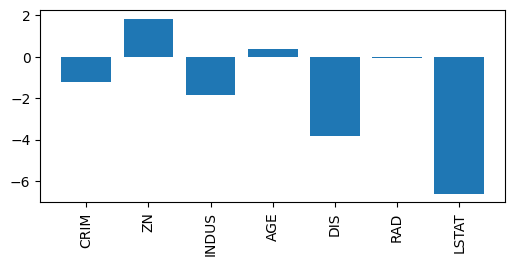

In [16]:
# plot the feature importance 
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.bar(features, lr_model.coef_)
_ = ax.set_xticklabels(features, rotation=90)

/tmp/ipykernel_8372/1346825688.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(features, rotation=90)


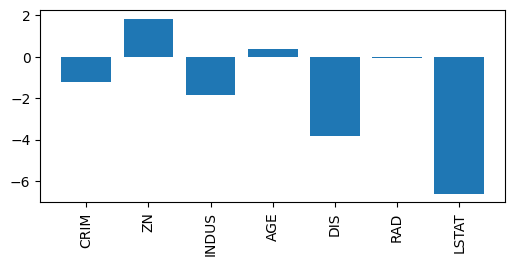

In [17]:
# plot the feature importance 
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.bar(features, lr_model.coef_)
_ = ax.set_xticklabels(features, rotation=90)


/tmp/ipykernel_8372/1346825688.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(features, rotation=90)


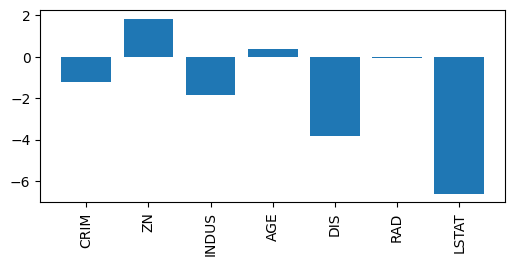

In [18]:
# plot the feature importance 
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.bar(features, lr_model.coef_)
_ = ax.set_xticklabels(features, rotation=90)


/tmp/ipykernel_8372/1346825688.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(features, rotation=90)


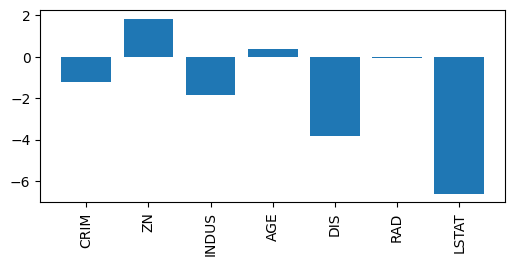

In [19]:
# plot the feature importance 
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.bar(features, lr_model.coef_)
_ = ax.set_xticklabels(features, rotation=90)


In [20]:
a = np.random.normal(0, 1, 1000)
b = np.random.normal(0, 1, 1000)
c = np.random.normal(0, 1, 1000) 
d = 7*a + 8*b + 9*c + 3

# calculate correlation 
print (np.corrcoef(a, b))
print (np.corrcoef(a, c))
print (np.corrcoef(b, c))

print (np.corrcoef(a, d))
print (np.corrcoef(b, d))
print (np.corrcoef(c, d))


[[ 1.         -0.05938869]
 [-0.05938869  1.        ]]
[[1.         0.00565981]
 [0.00565981 1.        ]]
[[ 1.00000000e+00 -3.47804976e-04]
 [-3.47804976e-04  1.00000000e+00]]
[[1.         0.48791375]
 [0.48791375 1.        ]]
[[1.         0.56451053]
 [0.56451053 1.        ]]
[[1.         0.64185819]
 [0.64185819 1.        ]]


In [21]:
df_m2 = pd.DataFrame({'a':a, 'b':b, 'c':c})

<AxesSubplot: xlabel='VIF Factor', ylabel='features'>

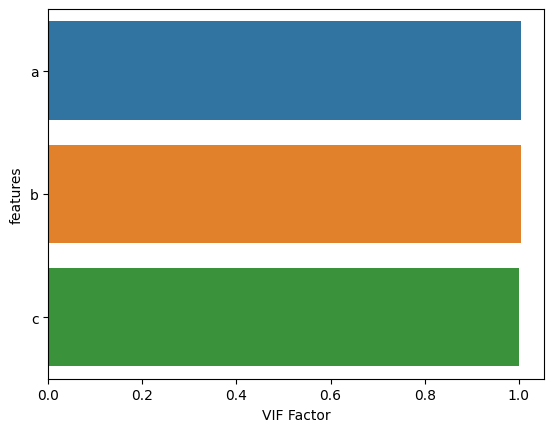

In [22]:
# calculate vif for each feature
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_m2.values, i) for i in range(df_m2.shape[1])]
vif["features"] = df_m2.columns
vif.round(1)
# plot the vif 
sns.barplot(x='VIF Factor', y='features', data=vif)

<AxesSubplot: >

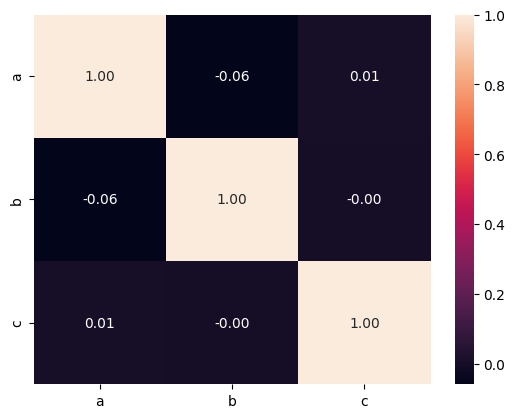

In [23]:
# plot the correlation matrix of df_m2 
sns.heatmap(df_m2.corr(), annot=True, fmt=".2f")

# Bias Variance 

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0


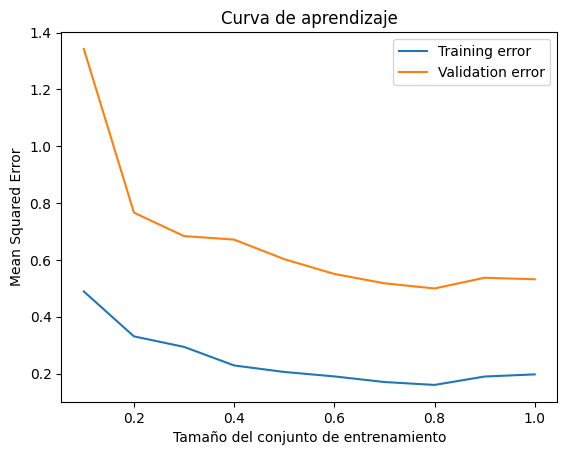

In [27]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carga tus datos
# df = pd.read_csv('tu_archivo.csv')
# X = df.drop('columna_objetivo', axis=1)
# y = df['columna_objetivo']

# Genera datos de ejemplo
np.random.seed(42)
X = np.random.rand(100, 3)
y = 3 * X[:, 0] + 2 * X[:, 1] + X[:, 2] + np.random.normal(0, 0.5, 100)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Elige un modelo de regresión con regularización (Ridge o Lasso)
model = Ridge(alpha=1.0)

# Valores para el tamaño del conjunto de entrenamiento
train_sizes = np.linspace(0.1, 1.0, 10)

# Listas para guardar los errores de entrenamiento y validación
train_errors = []
validation_errors = []

# Calcula los errores de entrenamiento y validación para cada tamaño del conjunto de entrenamiento
for size in train_sizes:
    n = int(len(X_train) * size)
    X_train_subset = X_train[:n]
    y_train_subset = y_train[:n]
    
    model.fit(X_train_subset, y_train_subset)
    
    train_pred = model.predict(X_train_subset)
    train_mse = mean_squared_error(y_train_subset, train_pred)
    train_errors.append(train_mse)
    
    validation_pred = model.predict(X_test)
    validation_mse = mean_squared_error(y_test, validation_pred)
    validation_errors.append(validation_mse)

# Grafica la curva de aprendizaje
plt.figure()
plt.plot(train_sizes, train_errors, label='Training error')
plt.plot(train_sizes, validation_errors, label='Validation error')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Curva de aprendizaje')
plt.show()
